# Fitting piecewise linear data

Import the required modules.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib inline

## Data generation

We generate piecewise linear data.

In [16]:
t = np.linspace(0.0, 100.0, 101)
signal = np.empty(t.shape)
break_point = 27
a1, a2 = 3.2, 1.8
b = 23.2
signal[:break_point] = a1*t[:break_point] + b
signal[break_point:] = a2*t[break_point:] + b + (a1 - a2)*t[break_point - 1]

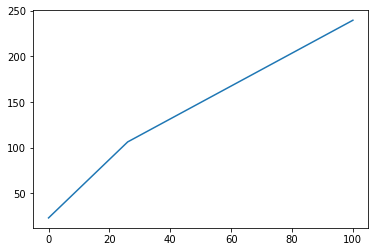

In [17]:
plt.plot(t, signal);

Add Gaussian noise to the signal.

In [18]:
noisy_signal = signal + np.random.normal(scale=3.0, size=signal.shape)

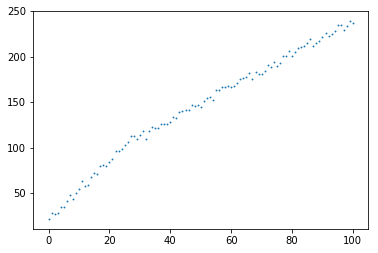

In [24]:
plt.scatter(t, noisy_signal, s=0.75);

Save to CSV file.

In [44]:
data = np.stack([t, noisy_signal]).T

In [45]:
data.shape

(101, 2)

In [47]:
np.savetxt('data2.csv', data, delimiter=',')

## Fitting the data

In [25]:
linregress(t, noisy_signal)

LinregressResult(slope=2.0495266363873608, intercept=41.858498432238505, rvalue=0.99166894290245688, pvalue=6.2014182667753503e-90, stderr=0.026756412853493464)

In [28]:
def comb_rvalue(t, y, break_point):
    _, _, rvalue1, _, _ = linregress(t[:break_point], y[:break_point])
    _, _, rvalue2, _, _ = linregress(t[break_point:], y[break_point:])
    return (rvalue1 + rvalue2)/2.0

In [35]:
def find_split(t, y):
    left = int(0.1*t.size)
    right = int(0.9*t.size) + 1
    index = left + np.argmax([comb_rvalue(t, y, b)
                              for b in range(left, right)])
    return t[index]

In [36]:
find_split(t, noisy_signal)

29.0

In [37]:
find_split(t, signal)

26.0

In [38]:
def comb_stderr(t, y, break_point):
    _, _, _, _, stderr1 = linregress(t[:break_point], y[:break_point])
    _, _, _, _, stderr2 = linregress(t[break_point:], y[break_point:])
    return (stderr1 + stderr2)/2.0

In [39]:
def find_split_stderr(t, y):
    left = int(0.1*t.size)
    right = int(0.9*t.size) + 1
    index = left + np.argmin([comb_stderr(t, y, b)
                              for b in range(left, right)])
    return t[index]

In [41]:
find_split_stderr(t, noisy_signal)

32.0

In [40]:
find_split_stderr(t, signal)

26.0